
Loaded file: cleaned_dataset.csv
Shape: (145, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Numeric columns detected:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Rows before cleaning NA: 145, after dropping NA: 145

Train shape: (116, 3) Test shape: (29, 3)

Results for target 'sepal_length':
MAE: 0.2274
RMSE: 0.2681

Saved metrics to Assignment5_results.txt


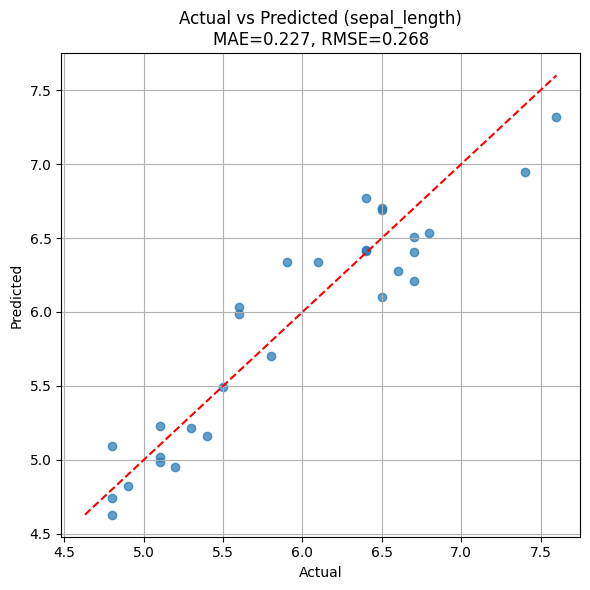


Saved plot as Assignment5_actual_vs_predicted.png

You can download these files now: Assignment5_results.txt and Assignment5_actual_vs_predicted.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Assignment 5 - Baseline Regression (Colab-ready)
# 1) Paste this into a new Colab notebook cell and run.
# 2) If you don't have cleaned_dataset.csv in Colab, the code will ask you to upload it.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import os

# -------------------------
# A. Load dataset
# -------------------------
DATA_FILE = "cleaned_dataset.csv"   # change name if your file is different

if not os.path.exists(DATA_FILE):
    # If not in Colab FS, let user upload
    try:
        from google.colab import files
        print("Upload your CSV file (cleaned dataset) now:")
        uploaded = files.upload()
        # take first uploaded file
        fname = next(iter(uploaded))
        DATA_FILE = fname
        df = pd.read_csv(DATA_FILE)
    except Exception as e:
        raise RuntimeError("Please make sure you upload a CSV file or place cleaned_dataset.csv in the notebook's folder.") from e
else:
    df = pd.read_csv(DATA_FILE)

print("\nLoaded file:", DATA_FILE)
print("Shape:", df.shape)
display(df.head())

# -------------------------
# B. Choose target column
# -------------------------
print("\nNumeric columns detected:")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)

# ---- IMPORTANT ----
# Replace TARGET with the name of your target variable.
# If there is a column named 'target', 'Target', 'Survived', 'price', 'Price', 'fare' etc,
# prefer those. If you are unsure, set TARGET to one of the printed numeric column names.
TARGET = "sepal_length"   # <<-- PUT YOUR TARGET COLUMN NAME HERE as a string, e.g. TARGET = "Fare"

if TARGET is None:
    # if exact guess candidates exist, pick common names automatically:
    common = [c for c in num_cols if c.lower() in ('target','survived','price','fare','amount','salary','marks','score','y')]
    if len(common) == 1:
        TARGET = common[0]
        print(f"\nAuto-selected target: {TARGET}")
    else:
        # ask user to fill TARGET in code cell (re-run) - show columns to pick from
        raise SystemExit("Please edit the notebook: set TARGET variable to your target column name from the printed numeric columns, then re-run the cell.")

# -------------------------
# C. Prepare X and y
# -------------------------
# Drop ID-like columns if present (common names)
drop_ids = [c for c in df.columns if c.lower() in ('id','index')]
if drop_ids:
    print("Dropping ID columns:", drop_ids)
    df = df.drop(columns=drop_ids)

# Select features: numeric columns except target
features = [c for c in df.select_dtypes(include=[np.number]).columns if c != TARGET]
if len(features) == 0:
    raise SystemExit("No numeric feature columns found other than target. Please prepare numeric features.")

X = df[features].copy()
y = df[TARGET].copy()

# Handle missing: simple strategy - drop rows with NA in X or y
before_rows = df.shape[0]
mask = ~X.isnull().any(axis=1) & y.notnull()
X = X[mask]
y = y[mask]
after_rows = X.shape[0]
print(f"Rows before cleaning NA: {before_rows}, after dropping NA: {after_rows}")

# -------------------------
# D. Train / Test split
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# -------------------------
# E. Train Linear Regression
# -------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------
# F. Predict & Evaluate
# -------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nResults for target '{TARGET}':")
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))

# Save metrics to a small text file
results_text = f"Target: {TARGET}\nFeatures used: {features}\nMAE: {mae}\nRMSE: {rmse}\nRows used (train+test): {before_rows}\n"
with open("Assignment5_results.txt", "w") as f:
    f.write(results_text)
print("\nSaved metrics to Assignment5_results.txt")

# -------------------------
# G. Plot: Actual vs Predicted (saved as PNG)
# -------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted ({TARGET})\nMAE={mae:.3f}, RMSE={rmse:.3f}")
plt.grid(True)
plt.tight_layout()
plot_name = "Assignment5_actual_vs_predicted.png"
plt.savefig(plot_name, dpi=150)
plt.show()
print("\nSaved plot as", plot_name)

# -------------------------
# H. Download files (optional)
# -------------------------
try:
    from google.colab import files as gcfiles
    print("\nYou can download these files now: Assignment5_results.txt and", plot_name)
    gcfiles.download("Assignment5_results.txt")
    gcfiles.download(plot_name)
except Exception:
    print("\nNot running in Colab environment or automatic download blocked. Use the Files panel to download Assignment5_results.txt and", plot_name)